# Results obtained with Num sessions metric as reward

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from Utils_2 import *
from linUCB_1 import *
import seaborn as sns

In [2]:
dataExt3 = pd.read_csv('DataExtra/game3.csv')
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

dataExt2 = pd.read_csv('DataExtra/game1.csv')
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1

In [3]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big2 = dataExt2[Features_ALL].copy()
data_big3 = dataExt3[Features_ALL].copy()
print("\nDataExtra3 different A/B tests counts:")
print(data_big3.ab_test_id.value_counts())
print("\nDataExtra2 different A/B tests counts:")
print(data_big2.ab_test_id.value_counts())


DataExtra3 different A/B tests counts:
3350    1381702
3301     776402
3331     717633
3292     706119
3346     655856
3307     413295
Name: ab_test_id, dtype: int64

DataExtra2 different A/B tests counts:
3495    486295
3552    458911
3582    301515
3473    285731
3457    247844
3454    245962
3565    225935
3420    184148
3507    163803
3526    159849
Name: ab_test_id, dtype: int64


In [4]:
Test_ID_big = 3301
Test_ID_big2 = 3582
NGU = 1
DataDef = data_big3[(data_big3.ab_test_id == Test_ID_big) & (data_big3.NGU == NGU)]
DataDef2 = data_big2[(data_big2.ab_test_id == Test_ID_big2) & (data_big2.NGU == NGU)]
print("2 Arms data shape:", DataDef.shape)
print("4 Arms data shape:", DataDef2.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
DataDef_cat = CreateDummies(DataDef, Features_Dummie)
DataDef_cat2 = CreateDummies(DataDef2, Features_Dummie)

2 Arms data shape: (743103, 30)
4 Arms data shape: (289806, 30)


In [5]:
Actual_Dataset = DataDef_cat.sample(n=20000, random_state=35)
Actual_Dataset2 = DataDef_cat2.sample(n=50000, random_state=13)

### 2 Arms experiment

#### Day 1

In [11]:
Reward = "num_sessions_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 8

Results1, Paths_Best1, Aligns_Best1, Mean_Reward_Best1, Mean_RewardArms_Best1, Mark_Best1, Feat_Best1, Times_ArmChosen1 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

  0%|▎                                                                             | 77/20000 [00:00<00:25, 769.98it/s]

Score to beat: 1.3648198198196084
Parameters for following model:
	Reward: num_sessions_d1
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 0.5


  0%|▎                                                                             | 77/20000 [00:00<00:25, 769.86it/s]

	Algorithm result is: 1.3696488098123012
	Score to beat is: 1.3648198198196084
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 1


  0%|▎                                                                             | 81/20000 [00:00<00:24, 802.12it/s]

	Algorithm result is: 1.3546808375786996
	Score to beat is: 1.3648198198196084
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 1.5


  0%|▎                                                                             | 85/20000 [00:00<00:23, 841.69it/s]

	Algorithm result is: 1.3799534791637287
	Score to beat is: 1.3648198198196084
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 2


  0%|▎                                                                             | 81/20000 [00:00<00:24, 800.90it/s]

	Algorithm result is: 1.3560594857599855
	Score to beat is: 1.3648198198196084
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 2.3581015157406195


  0%|▎                                                                             | 82/20000 [00:00<00:24, 811.27it/s]

	Algorithm result is: 1.3540892074211737
	Score to beat is: 1.3648198198196084
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 2.480207187300798


  0%|▎                                                                             | 79/20000 [00:00<00:25, 789.27it/s]

	Algorithm result is: 1.353922470061174
	Score to beat is: 1.3648198198196084
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 3


  0%|▎                                                                             | 85/20000 [00:00<00:23, 841.72it/s]

	Algorithm result is: 1.3576338270025334
	Score to beat is: 1.3648198198196084
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:24<00:00, 822.52it/s]

	Algorithm result is: 1.3517556745444403
	Score to beat is: 1.3648198198196084


In [12]:
Results1

[1.3696488098123012,
 1.3546808375786996,
 1.3799534791637287,
 1.3560594857599855,
 1.3540892074211737,
 1.353922470061174,
 1.3576338270025334,
 1.3517556745444403]

In [13]:
print("Best alpha is:", Alphas[Results1.index(np.max(Results1))])
Alpha = Alphas[Results1.index(np.max(Results1))]

Best alpha is: 1.5


In [14]:
Mean_Reward_Best1

[1.3682830560822818,
 1.382197490603695,
 1.3680004293576284,
 1.3914938601462445,
 1.3666311210882378,
 1.3599609003171726,
 1.4208075525322426,
 1.3822534231823262]

In [15]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

1.366969594893147
1.3626458316723242


In [16]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1))

Score to beat: 1.3648198198196084
Algorithm score: 1.3799534791637287


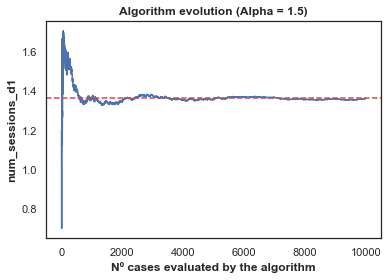

In [17]:
Plot_AlignRewards(Aligns_Best1, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

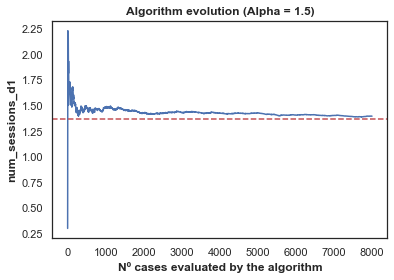

In [20]:
Plot_AlignRewards(Aligns_Best1, 6, Reward, Alpha, N = 8000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

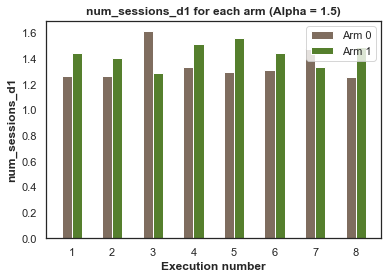

In [21]:
PerformanceArm2(Mean_RewardArms_Best1, Alpha, Reward)

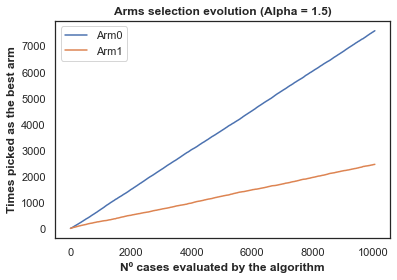

In [23]:
Plot_ArmsSelection(Paths_Best1, 4, Alpha)

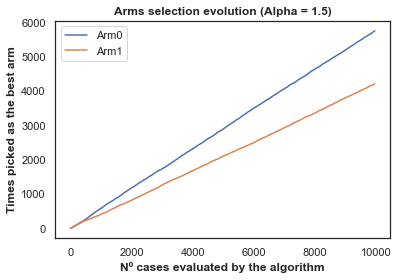

In [26]:
Plot_ArmsSelection(Paths_Best1, 7, Alpha)

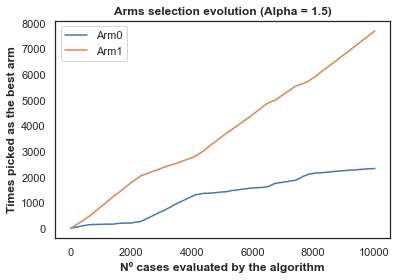

In [27]:
Plot_ArmsSelection(Paths_Best1, 1, Alpha)

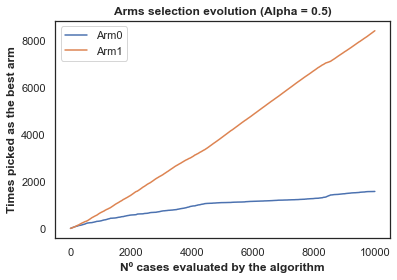

In [26]:
Plot_ArmsSelection(Paths_Best1, 4, Alpha)

Times each arm is chosen: [5141.75 4856.25]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 18.029934276121256
Proportion source_alias_source2 equals 0 for arm 1 is: 30.185754915059004


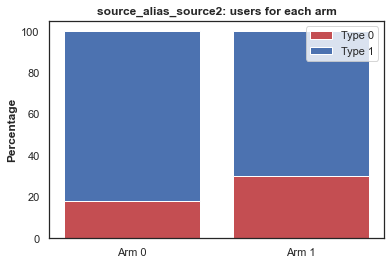

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 81.42064817693215
Proportion platform_alias_platform2 equals 0 for arm 1 is: 56.76284119700372


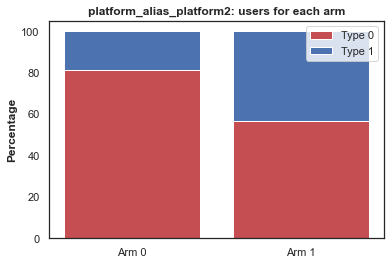

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64



TypeError: reduction operation 'argmax' not allowed for this dtype

In [28]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best1, Feat_Best1)

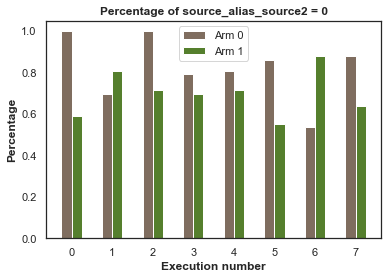

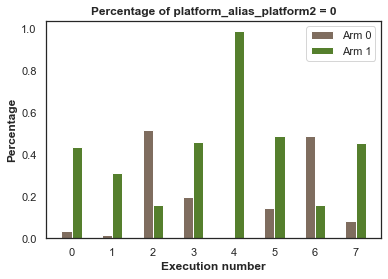

In [179]:
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "platform_alias_platform2")

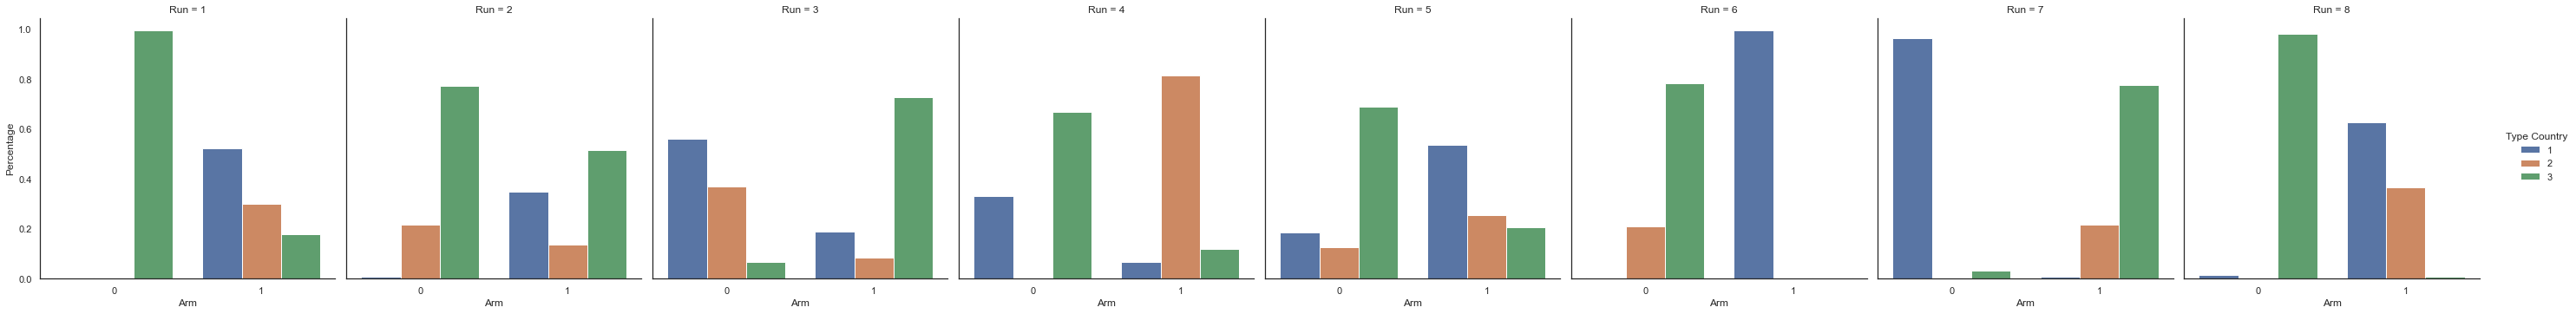

In [202]:
Country_8Runs(Feat_Best1)

#### Day 3

In [29]:
Reward = "num_sessions_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 8

Results3, Paths_Best3, Aligns_Best3, Mean_Reward_Best3, Mean_RewardArms_Best3, Mark_Best3, Feat_Best3, Times_ArmChosen3 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

  0%|▏                                                                             | 55/20000 [00:00<00:36, 549.73it/s]

Score to beat: 2.1419519519519516
Parameters for following model:
	Reward: num_sessions_d3
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 0.5


  0%|▎                                                                             | 69/20000 [00:00<00:28, 689.93it/s]

	Algorithm result is: 2.1135748532373113
	Score to beat is: 2.1419519519519516
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 1


  0%|▎                                                                             | 72/20000 [00:00<00:27, 719.32it/s]

	Algorithm result is: 2.1605743593251034
	Score to beat is: 2.1419519519519516
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 1.5


  0%|▎                                                                             | 77/20000 [00:00<00:25, 769.28it/s]

	Algorithm result is: 2.14565148705056
	Score to beat is: 2.1419519519519516
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 2


  1%|▌                                                                            | 141/20000 [00:00<00:28, 698.90it/s]

	Algorithm result is: 2.139392653684806
	Score to beat is: 2.1419519519519516
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 2.3581015157406195


  0%|▎                                                                             | 71/20000 [00:00<00:28, 709.59it/s]

	Algorithm result is: 2.0976350400543726
	Score to beat is: 2.1419519519519516
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 2.480207187300798


  0%|▎                                                                             | 66/20000 [00:00<00:30, 653.38it/s]

	Algorithm result is: 2.1608270021719633
	Score to beat is: 2.1419519519519516
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 3


  0%|▎                                                                             | 68/20000 [00:00<00:29, 667.22it/s]

	Algorithm result is: 2.1499105641209257
	Score to beat is: 2.1419519519519516
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:28<00:00, 707.10it/s]

	Algorithm result is: 2.1391679917796447
	Score to beat is: 2.1419519519519516


In [30]:
Results3

[2.1135748532373113,
 2.1605743593251034,
 2.14565148705056,
 2.139392653684806,
 2.0976350400543726,
 2.1608270021719633,
 2.1499105641209257,
 2.1391679917796447]

In [31]:
print("Best alpha is:", Alphas[Results3.index(np.max(Results3))])
Alpha = Alphas[Results3.index(np.max(Results3))]

Best alpha is: 2.480207187300798


In [32]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

2.1339955707495797
2.1499979464579715


In [33]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3))

Score to beat: 2.1419519519519516
Algorithm score: 2.1608270021719633


In [34]:
Mean_Reward_Best3

[2.1237811916537415,
 2.3764064924604873,
 2.152815703980303,
 2.063433733628254,
 2.190627900884552,
 2.1794712548558133,
 2.0544588390588028,
 2.145620900853753]

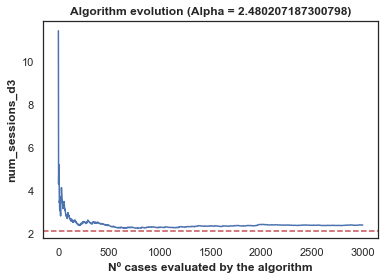

In [37]:
Plot_AlignRewards(Aligns_Best3, 1, Reward, Alpha, N = 3000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

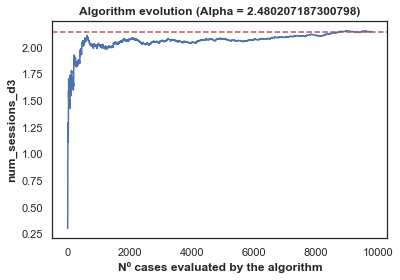

In [40]:
Plot_AlignRewards(Aligns_Best3, 3, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

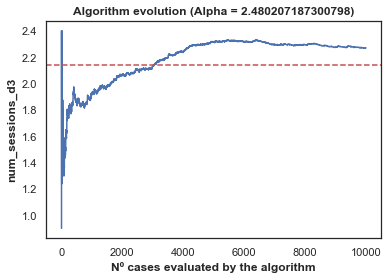

In [41]:
Plot_AlignRewards(Aligns_Best3, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

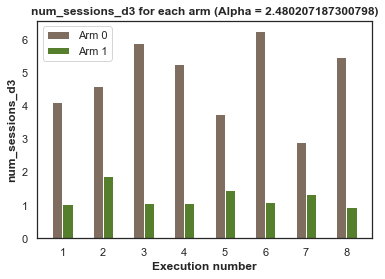

In [43]:
PerformanceArm2(Mean_RewardArms_Best3, Alpha, Reward)

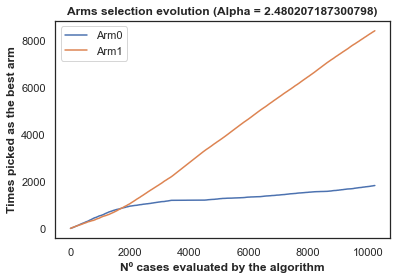

In [45]:
Plot_ArmsSelection(Paths_Best3, 1, Alpha)

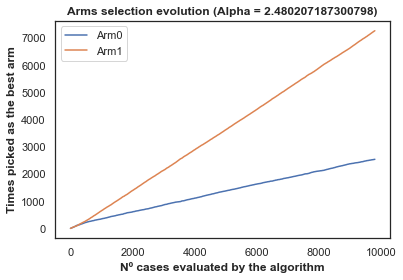

In [46]:
Plot_ArmsSelection(Paths_Best3, 3, Alpha)

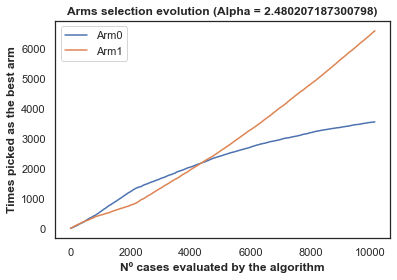

In [47]:
Plot_ArmsSelection(Paths_Best3, 4, Alpha)

Times each arm is chosen: [2903.75  7099.875]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 24.178899409807386
Proportion source_alias_source2 equals 0 for arm 1 is: 20.96092049379833


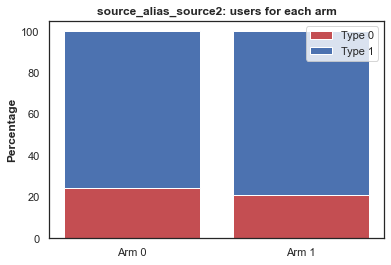

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 58.15557418626247
Proportion platform_alias_platform2 equals 0 for arm 1 is: 82.49532873464324


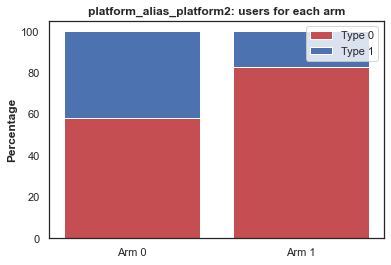

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.37091575 0.14050263 0.48858162]
Proportion country for arm 1 is: [0.24164163 0.16852468 0.58983369]


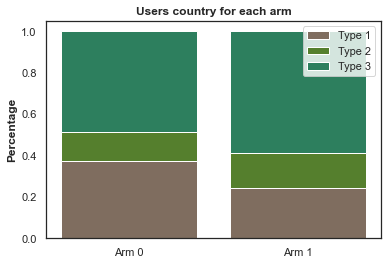

In [48]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3, Feat_Best3)

In [207]:
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]

Proportion country_alias_country_group1 equals 0 for arm 0 is: 62.90842504705441
Proportion country_alias_country_group1 equals 0 for arm 1 is: 75.83583711014299

Proportion country_alias_country_group2 equals 0 for arm 0 is: 85.94973739009009
Proportion country_alias_country_group2 equals 0 for arm 1 is: 83.14753214602908

Proportion country_alias_country_group3 equals 0 for arm 0 is: 51.14183756285551
Proportion country_alias_country_group3 equals 0 for arm 1 is: 41.01663074382793

Proportion platform_alias_platform2 equals 0 for arm 0 is: 58.15557418626247
Proportion platform_alias_platform2 equals 0 for arm 1 is: 82.49532873464324

Proportion source_alias_source2 equals 0 for arm 0 is: 24.178899409807386
Proportion source_alias_source2 equals 0 for arm 1 is: 20.96092049379833

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 25.793951871920928
Proportion return_d1 equals 0 for arm 1 is: 66.282259429

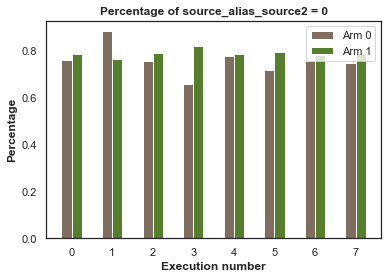

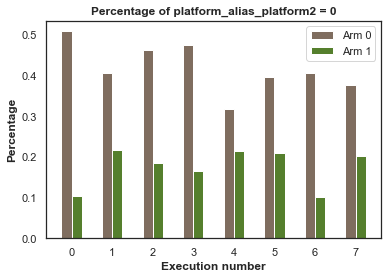

In [208]:
printFeatures2(Mark_Best3, Feat_Best3, Features)
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "platform_alias_platform2")

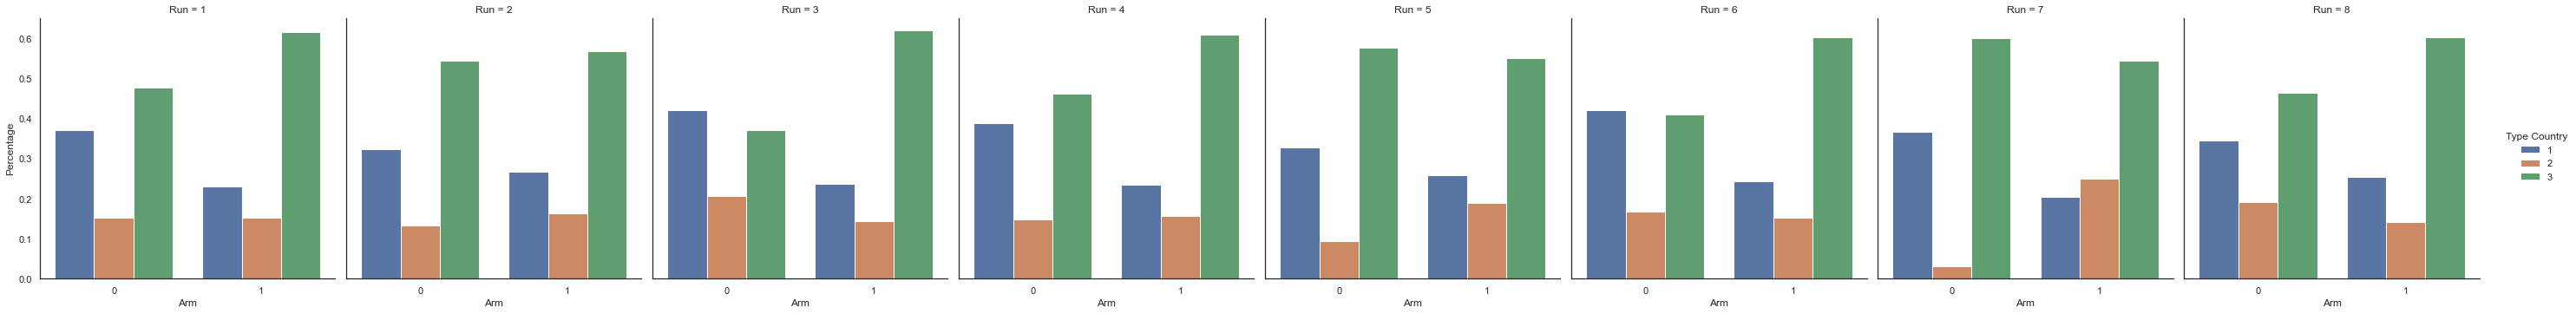

In [204]:
Country_8Runs(Feat_Best3)

#### Day 7

In [49]:
Reward = "num_sessions_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7, Paths_Best7, Aligns_Best7, Mean_Reward_Best7, Mean_RewardArms_Best7, Mark_Best7, Feat_Best7, Times_ArmChosen7 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

  0%|▏                                                                             | 46/20000 [00:00<00:44, 451.15it/s]

Score to beat: 3.1371021021023138
Parameters for following model:
	Reward: num_sessions_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 0.5


  0%|▏                                                                             | 48/20000 [00:00<00:42, 474.85it/s]

	Algorithm result is: 3.01670718002371
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 1


  0%|▏                                                                             | 51/20000 [00:00<00:39, 510.00it/s]

	Algorithm result is: 3.0328547352389004
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 1.5


  0%|▏                                                                             | 50/20000 [00:00<00:40, 490.20it/s]

	Algorithm result is: 3.0464442332439594
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2


  0%|▏                                                                             | 46/20000 [00:00<00:44, 450.65it/s]

	Algorithm result is: 3.0836453469242686
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2.3581015157406195


  0%|▏                                                                             | 50/20000 [00:00<00:41, 485.60it/s]

	Algorithm result is: 3.0317278886402392
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2.480207187300798


  0%|▏                                                                             | 52/20000 [00:00<00:38, 514.57it/s]

	Algorithm result is: 3.0792698043849818
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 3


  0%|▏                                                                             | 49/20000 [00:00<00:41, 485.17it/s]

	Algorithm result is: 3.087302041144361
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:39<00:00, 511.60it/s]

	Algorithm result is: 3.0568531052099184
	Score to beat is: 3.1371021021023138


In [50]:
Results7

[3.01670718002371,
 3.0328547352389004,
 3.0464442332439594,
 3.0836453469242686,
 3.0317278886402392,
 3.0792698043849818,
 3.087302041144361,
 3.0568531052099184]

In [51]:
print("Best alpha is:", Alphas[Results7.index(np.max(Results7))])
Alpha = Alphas[Results7.index(np.max(Results7))]

Best alpha is: 3


In [52]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

3.1245147295264504
3.149831247176181


In [53]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7))

Score to beat: 3.1371021021023138
Algorithm score: 3.087302041144361


In [54]:
Mean_Reward_Best7

[3.0284033406565705,
 3.1532771909717554,
 3.082059980659284,
 3.1083053146161785,
 3.0644643788180175]

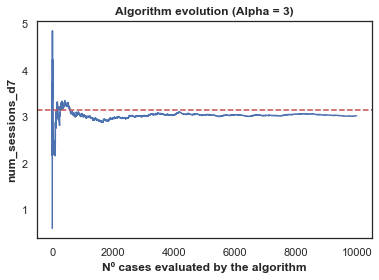

In [56]:
Plot_AlignRewards(Aligns_Best7, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

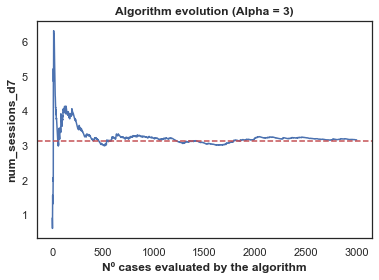

In [60]:
Plot_AlignRewards(Aligns_Best7, 1, Reward, Alpha, N = 3000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

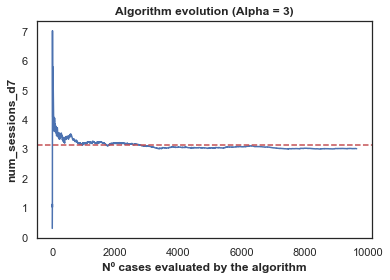

In [61]:
Plot_AlignRewards(Aligns_Best7, 3, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

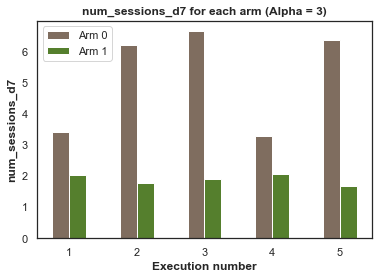

In [62]:
PerformanceArm2(Mean_RewardArms_Best7, Alpha, Reward)

In [63]:
Times_ArmChosen7

[[7136, 2878], [2893, 6832], [2743, 7178], [7518, 2135], [2966, 6730]]

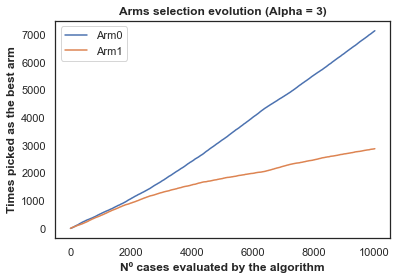

In [65]:
Plot_ArmsSelection(Paths_Best7, 0, Alpha)

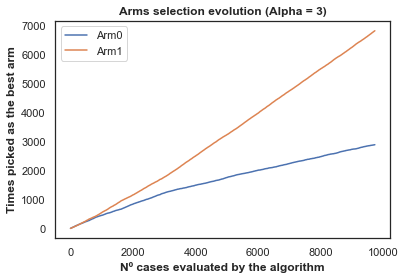

In [66]:
Plot_ArmsSelection(Paths_Best7, 1, Alpha)

Times each arm is chosen: [4651.2 5150.6]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 25.248667946324243
Proportion source_alias_source2 equals 0 for arm 1 is: 24.673000527028627


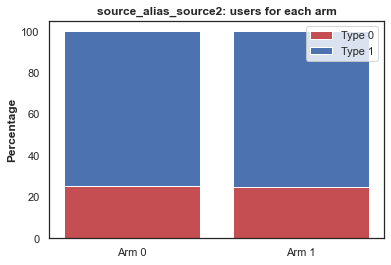

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 67.76926263272294
Proportion platform_alias_platform2 equals 0 for arm 1 is: 74.68054951121862


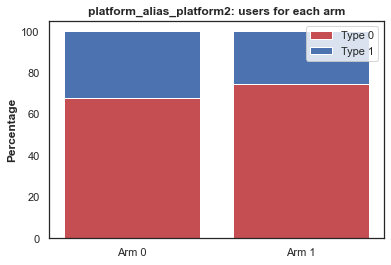

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.27137317 0.24163727 0.48698955]
Proportion country for arm 1 is: [0.35213032 0.12100325 0.52686643]


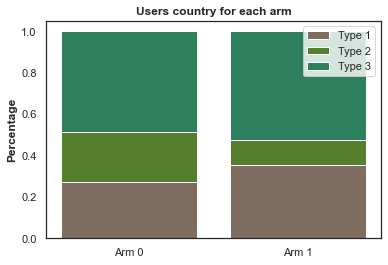

In [67]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7, Feat_Best7)

In [213]:
printFeatures2(Mark_Best7, Feat_Best7, Features)
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "platform_alias_platform2")

Proportion country_alias_country_group1 equals 0 for arm 0 is: 69.36373703018111
Proportion country_alias_country_group1 equals 0 for arm 1 is: 73.20403219805056

Proportion country_alias_country_group2 equals 0 for arm 0 is: 75.47582916960012
Proportion country_alias_country_group2 equals 0 for arm 1 is: 88.55922599869072

Proportion country_alias_country_group3 equals 0 for arm 0 is: 55.16043380021877
Proportion country_alias_country_group3 equals 0 for arm 1 is: 38.236741803258724

Proportion platform_alias_platform2 equals 0 for arm 0 is: 64.21780575135412
Proportion platform_alias_platform2 equals 0 for arm 1 is: 79.58644808990906

Proportion source_alias_source2 equals 0 for arm 0 is: 28.56335553760852
Proportion source_alias_source2 equals 0 for arm 1 is: 20.67174779354372

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 22.344440348485595
Proportion return_d1 equals 0 for arm 1 is: 67.259589183

KeyError: 'return_d3'

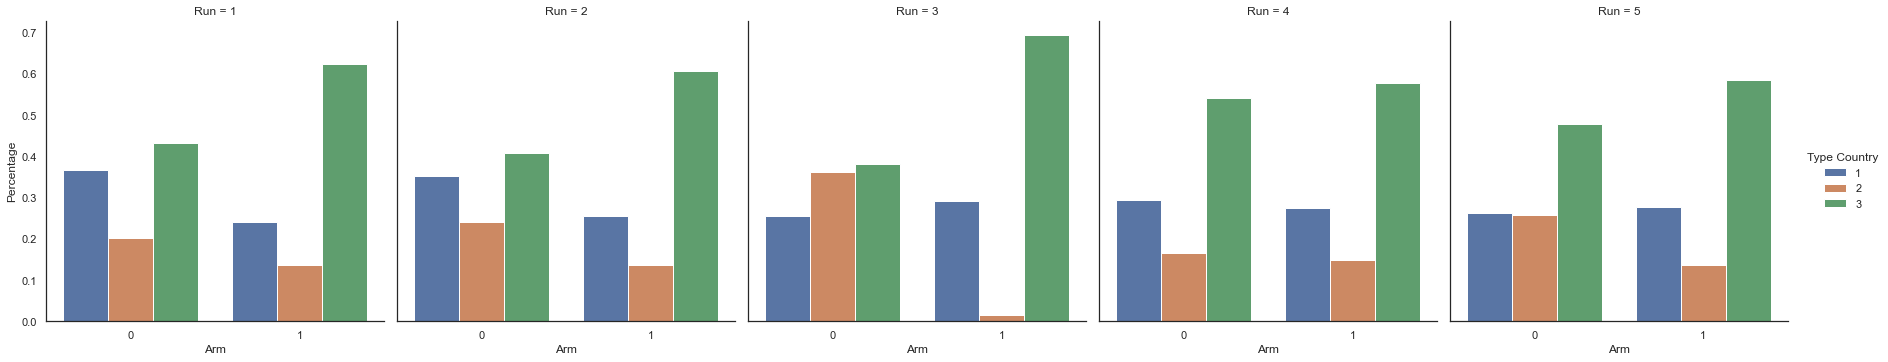

In [211]:
Country_5Runs(Feat_Best7)

#### Removing features

In [68]:
Reward = "num_sessions_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7, Paths_Best7, Aligns_Best7, Mean_Reward_Best7, Mean_RewardArms_Best7, Mark_Best7, Feat_Best7, Times_ArmChosen7 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

  0%|▎                                                                             | 71/20000 [00:00<00:28, 709.14it/s]

Score to beat: 3.1371021021023138
Parameters for following model:
	Reward: num_sessions_d7
	Number of Arms: 2
	Alphas:  [1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 1.5


  0%|▎                                                                             | 67/20000 [00:00<00:30, 662.81it/s]

	Algorithm result is: 3.178532279747804
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2


  0%|▎                                                                             | 67/20000 [00:00<00:30, 663.71it/s]

	Algorithm result is: 3.128995963737611
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2.3581015157406195


  0%|▎                                                                             | 69/20000 [00:00<00:28, 689.46it/s]

	Algorithm result is: 3.0481520036350607
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2.480207187300798


  0%|▎                                                                             | 70/20000 [00:00<00:29, 686.59it/s]

	Algorithm result is: 3.0895210030016163
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 3


  0%|▎                                                                             | 68/20000 [00:00<00:29, 673.31it/s]

	Algorithm result is: 3.2329850151186834
	Score to beat is: 3.1371021021023138
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:28<00:00, 714.26it/s]

	Algorithm result is: 3.068992964836762
	Score to beat is: 3.1371021021023138


In [69]:
Results7

[3.178532279747804,
 3.128995963737611,
 3.0481520036350607,
 3.0895210030016163,
 3.2329850151186834,
 3.068992964836762]

In [70]:
print("Best alpha is:", Alphas[Results7.index(np.max(Results7))])
Alpha = Alphas[Results7.index(np.max(Results7))]

Best alpha is: 3


In [71]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

3.1245147295264504
3.149831247176181


In [72]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7))

Score to beat: 3.1371021021023138
Algorithm score: 3.2329850151186834


In [73]:
Mean_Reward_Best7

[3.1033136761939004,
 3.2091149391243676,
 3.3428606742535285,
 3.175982212390706,
 3.3336535736309125]

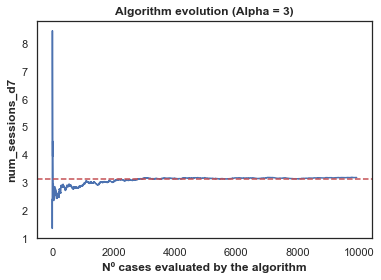

In [74]:
Plot_AlignRewards(Aligns_Best7, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

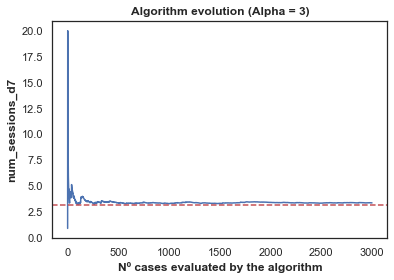

In [78]:
Plot_AlignRewards(Aligns_Best7, 2, Reward, Alpha, N = 3000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

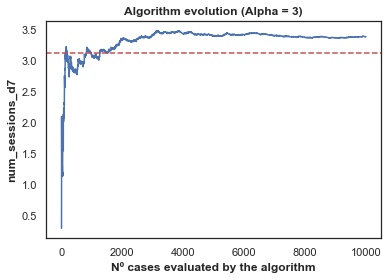

In [82]:
Plot_AlignRewards(Aligns_Best7, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

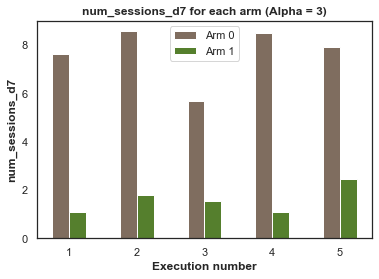

In [83]:
PerformanceArm2(Mean_RewardArms_Best7, Alpha, Reward)

In [84]:
Times_ArmChosen7

[[3151, 6772], [1975, 8008], [4103, 5865], [2795, 7132], [1779, 8417]]

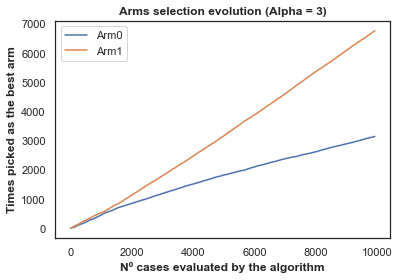

In [85]:
Plot_ArmsSelection(Paths_Best7, 0, Alpha)

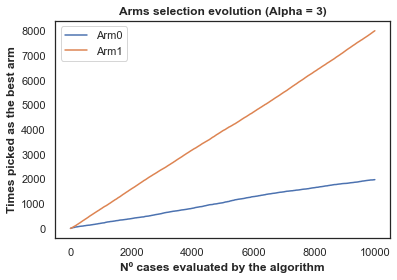

In [86]:
Plot_ArmsSelection(Paths_Best7, 1, Alpha)

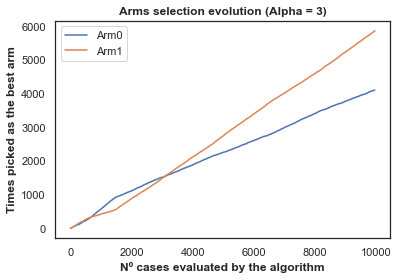

In [87]:
Plot_ArmsSelection(Paths_Best7, 2, Alpha)

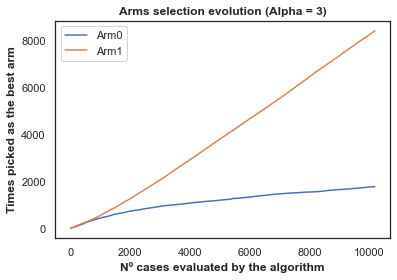

In [88]:
Plot_ArmsSelection(Paths_Best7, 4, Alpha)

Times each arm is chosen: [2760.6 7238.8]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 28.56335553760852
Proportion source_alias_source2 equals 0 for arm 1 is: 20.67174779354372


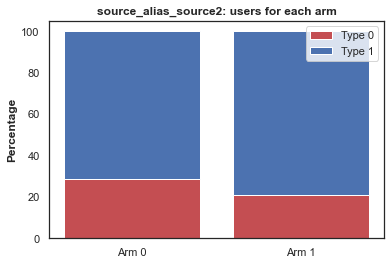

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 64.21780575135412
Proportion platform_alias_platform2 equals 0 for arm 1 is: 79.58644808990906


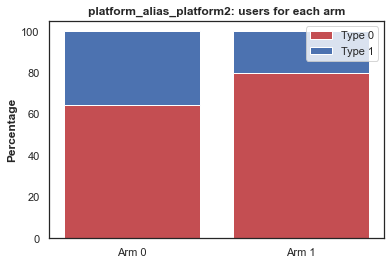

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.30636263 0.24524171 0.44839566]
Proportion country for arm 1 is: [0.26795968 0.11440774 0.61763258]


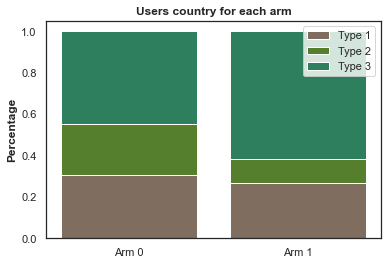

In [89]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7, Feat_Best7)

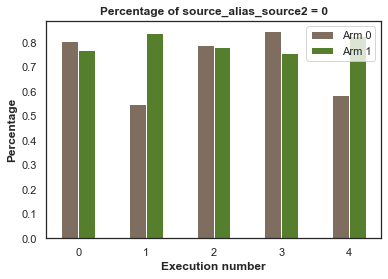

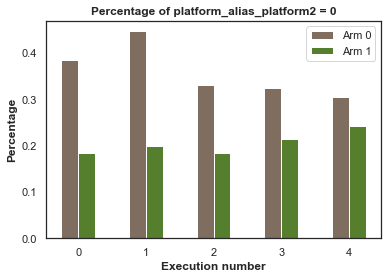

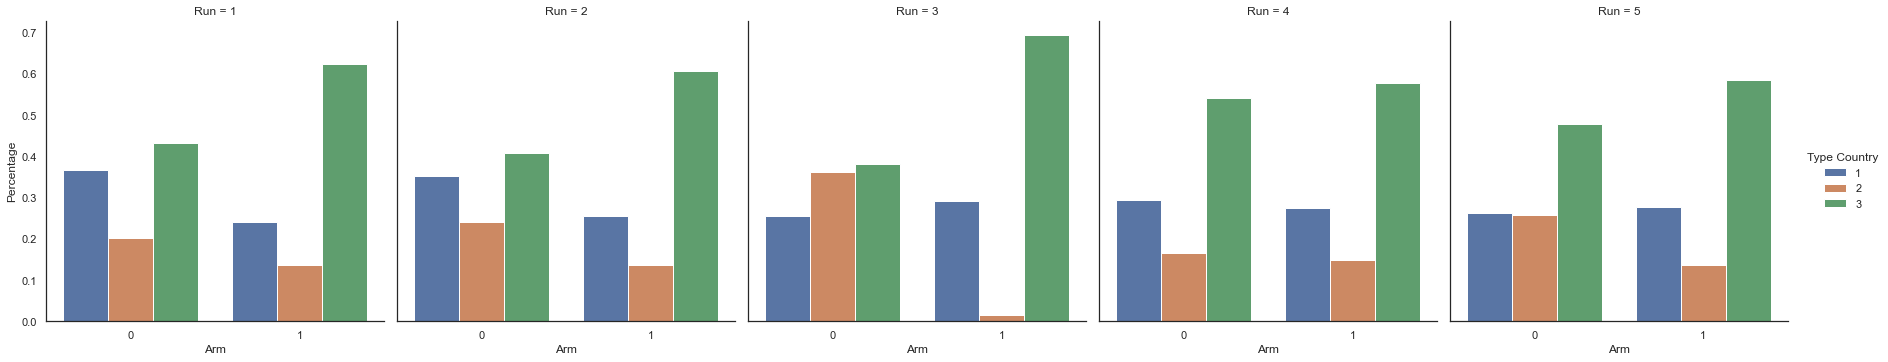

In [168]:
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "platform_alias_platform2")
Country_5Runs(Feat_Best7)

In [171]:
printFeatures2(Mark_Best7, Feat_Best7, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 69.36373703018111
Proportion country_alias_country_group1 equals 0 for arm 1 is: 73.20403219805056

Proportion country_alias_country_group2 equals 0 for arm 0 is: 75.47582916960012
Proportion country_alias_country_group2 equals 0 for arm 1 is: 88.55922599869072

Proportion country_alias_country_group3 equals 0 for arm 0 is: 55.16043380021877
Proportion country_alias_country_group3 equals 0 for arm 1 is: 38.236741803258724

Proportion platform_alias_platform2 equals 0 for arm 0 is: 64.21780575135412
Proportion platform_alias_platform2 equals 0 for arm 1 is: 79.58644808990906

Proportion source_alias_source2 equals 0 for arm 0 is: 28.56335553760852
Proportion source_alias_source2 equals 0 for arm 1 is: 20.67174779354372

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 22.344440348485595
Proportion return_d1 equals 0 for arm 1 is: 67.259589183

### 4 Arms experiments

#### Day 1

In [90]:
Reward = "num_sessions_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results1_4, Paths_Best1_4, Aligns_Best1_4, Mean_Reward_Best1_4, Mean_RewardArms_Best1_4, Mark_Best1_4, Feat_Best1_4, Times_ArmChosen1_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

  0%|▏                                                                             | 90/50000 [00:00<00:55, 899.31it/s]

Score to beat: 0.6880720720718231
Parameters for following model:
	Reward: num_sessions_d1
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 0.5


  0%|▏                                                                             | 91/50000 [00:00<00:54, 909.05it/s]

	Algorithm result is: 0.6866997788563968
	Score to beat is: 0.6880720720718231
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 1


  0%|▏                                                                             | 98/50000 [00:00<00:51, 978.39it/s]

	Algorithm result is: 0.6877035644645323
	Score to beat is: 0.6880720720718231
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 1.5


  0%|▏                                                                             | 97/50000 [00:00<00:51, 968.99it/s]

	Algorithm result is: 0.690802461545799
	Score to beat is: 0.6880720720718231
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 2


  0%|▏                                                                             | 87/50000 [00:00<00:57, 869.22it/s]

	Algorithm result is: 0.6901530625791767
	Score to beat is: 0.6880720720718231
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 2.3581015157406195


  0%|                                                                              | 63/50000 [00:00<01:20, 617.55it/s]

	Algorithm result is: 0.6863423242024941
	Score to beat is: 0.6880720720718231
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 2.480207187300798


  0%|▏                                                                             | 88/50000 [00:00<00:56, 879.19it/s]

	Algorithm result is: 0.6921105688291618
	Score to beat is: 0.6880720720718231
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 3


  0%|▏                                                                             | 99/50000 [00:00<00:50, 989.94it/s]

	Algorithm result is: 0.6853644734148755
	Score to beat is: 0.6880720720718231
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d1 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:51<00:00, 964.61it/s]

	Algorithm result is: 0.6903653988447156
	Score to beat is: 0.6880720720718231


In [91]:
Results1_4

[0.6866997788563968,
 0.6877035644645323,
 0.690802461545799,
 0.6901530625791767,
 0.6863423242024941,
 0.6921105688291618,
 0.6853644734148755,
 0.6903653988447156]

In [92]:
print("Best alpha is:", Alphas[Results1_4.index(np.max(Results1_4))])
Alpha = Alphas[Results1_4.index(np.max(Results1_4))]

Best alpha is: 2.480207187300798


In [93]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.6851803726804292
0.68825543278103


In [95]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1_4))

Score to beat: 0.6880720720718231
Algorithm score: 0.6921105688291618


In [96]:
Mean_Reward_Best1_4

[0.6895731516951423,
 0.6810312391893214,
 0.7055190843003052,
 0.6957935693524518,
 0.6886357996085879]

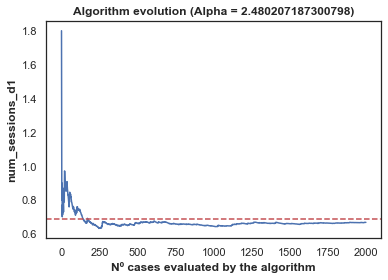

In [97]:
Plot_AlignRewards(Aligns_Best1_4, 1, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

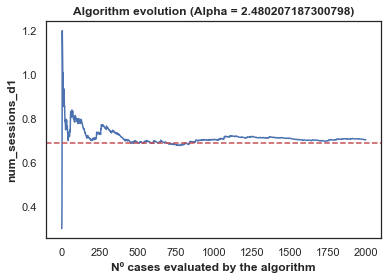

In [98]:
Plot_AlignRewards(Aligns_Best1_4, 2, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

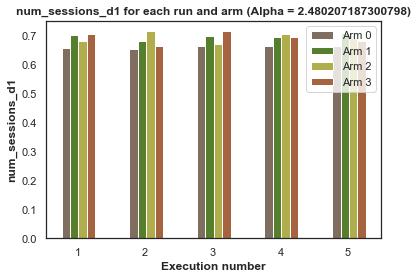

In [101]:
PerformanceArm4(Mean_RewardArms_Best1_4, Alpha, Reward)

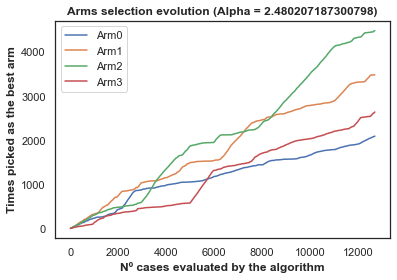

In [102]:
Plot_ArmsSelection(Paths_Best1_4, 1, Alpha)

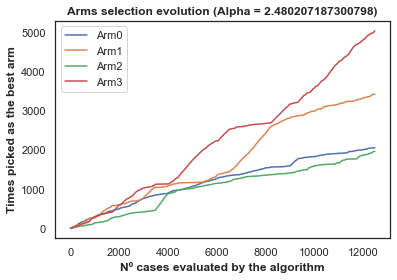

In [103]:
Plot_ArmsSelection(Paths_Best1_4, 2, Alpha)

Times each arm is chosen: [1825.8 3631.2 3345.6 3712. ]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 50.4677712741335
Proportion source_alias_source2 equals 0 for arm 1 is: 79.86311800320256
Proportion source_alias_source2 equals 0 for arm 2 is: 81.90098133088217
Proportion source_alias_source2 equals 0 for arm 3 is: 73.94334421231854


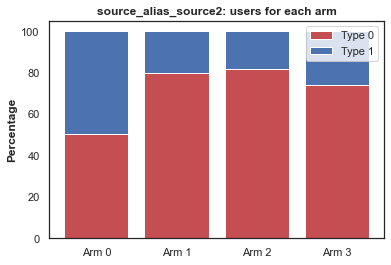

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 55.759049051816355
Proportion platform_alias_platform2 equals 0 for arm 1 is: 78.92571258902234
Proportion platform_alias_platform2 equals 0 for arm 2 is: 88.7694279413526
Proportion platform_alias_platform2 equals 0 for arm 3 is: 87.63639063114454


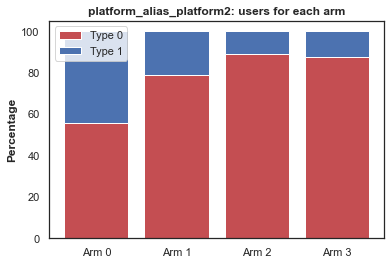

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64



TypeError: reduction operation 'argmax' not allowed for this dtype

In [104]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1_4, Feat_Best1_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1_4, Feat_Best1_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best1_4, Feat_Best1_4)

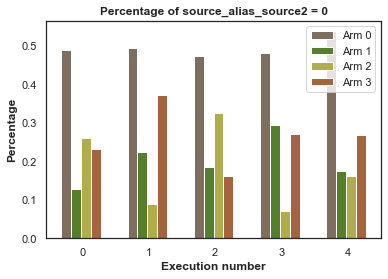

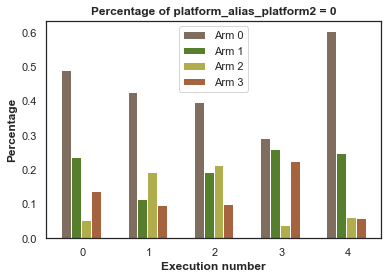

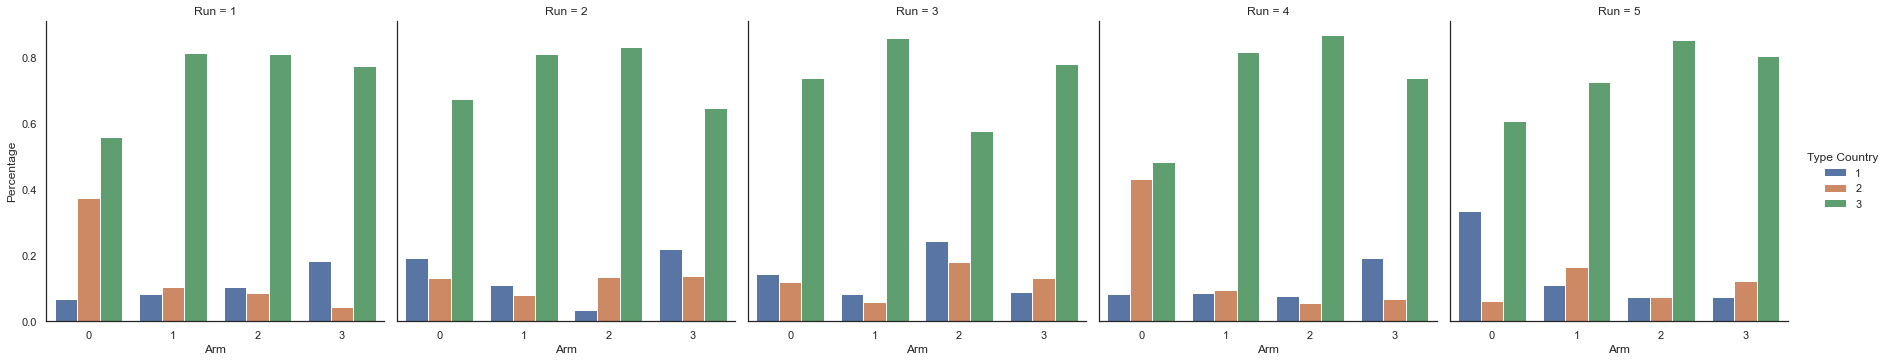

In [165]:
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "platform_alias_platform2")
PlotFeaturesArm_4_Country5Runs(Feat_Best1_4)

In [174]:
printFeatures2(Mark_Best1_4, Feat_Best1_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 83.60495964777277
Proportion country_alias_country_group1 equals 0 for arm 1 is: 90.61522285607478
Proportion country_alias_country_group1 equals 0 for arm 2 is: 89.37506302999886
Proportion country_alias_country_group1 equals 0 for arm 3 is: 84.90361659988872

Proportion country_alias_country_group2 equals 0 for arm 0 is: 77.6440926068601
Proportion country_alias_country_group2 equals 0 for arm 1 is: 89.940934768091
Proportion country_alias_country_group2 equals 0 for arm 2 is: 89.48897351614258
Proportion country_alias_country_group2 equals 0 for arm 3 is: 89.96153155890325

Proportion country_alias_country_group3 equals 0 for arm 0 is: 38.75094774536713
Proportion country_alias_country_group3 equals 0 for arm 1 is: 19.443842375834222
Proportion country_alias_country_group3 equals 0 for arm 2 is: 21.135963453858558
Proportion country_alias_country_group3 equals 0 for arm 3 is: 25.13485184120802

Proportion platform_alias_

#### Day 3

In [106]:
Reward = "num_sessions_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results3_4, Paths_Best3_4, Aligns_Best3_4, Mean_Reward_Best3_4, Mean_RewardArms_Best3_4, Mark_Best3_4, Feat_Best3_4, Times_ArmChosen3_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

  0%|                                                                              | 39/50000 [00:00<02:08, 389.67it/s]

Score to beat: 0.9042942942943948
Parameters for following model:
	Reward: num_sessions_d3
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 0.5


  0%|                                                                              | 48/50000 [00:00<01:44, 479.56it/s]

	Algorithm result is: 0.9134237016411149
	Score to beat is: 0.9042942942943948
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 1


  0%|                                                                              | 52/50000 [00:00<01:36, 519.60it/s]

	Algorithm result is: 0.8973403932506197
	Score to beat is: 0.9042942942943948
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 1.5


  0%|                                                                              | 46/50000 [00:00<01:49, 455.06it/s]

	Algorithm result is: 0.9148144153206939
	Score to beat is: 0.9042942942943948
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 2


  0%|                                                                              | 51/50000 [00:00<01:38, 504.77it/s]

	Algorithm result is: 0.8959361882002789
	Score to beat is: 0.9042942942943948
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 2.3581015157406195


  0%|                                                                              | 53/50000 [00:00<01:35, 523.87it/s]

	Algorithm result is: 0.9004336486105691
	Score to beat is: 0.9042942942943948
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 2.480207187300798


  0%|                                                                              | 53/50000 [00:00<01:34, 529.98it/s]

	Algorithm result is: 0.9016829490622473
	Score to beat is: 0.9042942942943948
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 3


  0%|                                                                              | 53/50000 [00:00<01:35, 524.89it/s]

	Algorithm result is: 0.9014237281695605
	Score to beat is: 0.9042942942943948
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d3 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:35<00:00, 523.65it/s]

	Algorithm result is: 0.9086979710214266
	Score to beat is: 0.9042942942943948


In [107]:
Results3_4

[0.9134237016411149,
 0.8973403932506197,
 0.9148144153206939,
 0.8959361882002789,
 0.9004336486105691,
 0.9016829490622473,
 0.9014237281695605,
 0.9086979710214266]

In [108]:
print("Best alpha is:", Alphas[Results3_4.index(np.max(Results3_4))])
Alpha = Alphas[Results3_4.index(np.max(Results3_4))]

Best alpha is: 1.5


In [109]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.9012377762377394
0.9033819252796957


In [111]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3_4))

Score to beat: 0.9042942942943948
Algorithm score: 0.9148144153206939


In [112]:
Mean_Reward_Best3_4

[0.9229008040102868,
 0.9067625341583354,
 0.9122989990959839,
 0.9116109175130325,
 0.920498821825831]

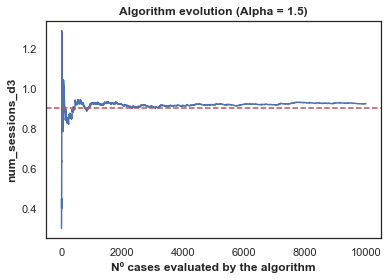

In [117]:
Plot_AlignRewards(Aligns_Best3_4, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

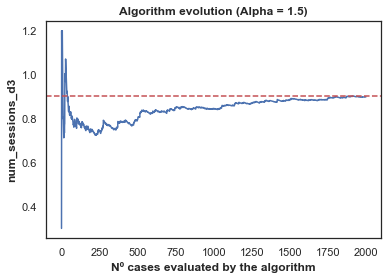

In [118]:
Plot_AlignRewards(Aligns_Best3_4, 1, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

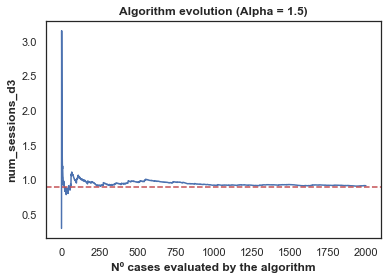

In [119]:
Plot_AlignRewards(Aligns_Best3_4, 2, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

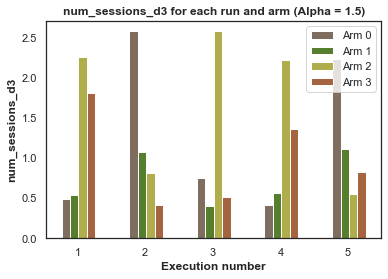

In [120]:
PerformanceArm4(Mean_RewardArms_Best3_4, Alpha, Reward)

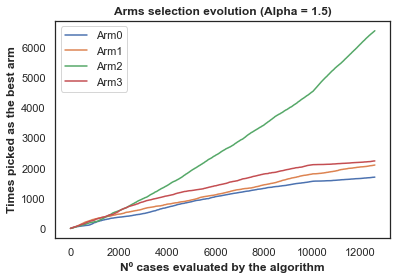

In [122]:
Plot_ArmsSelection(Paths_Best3_4, 4, Alpha)

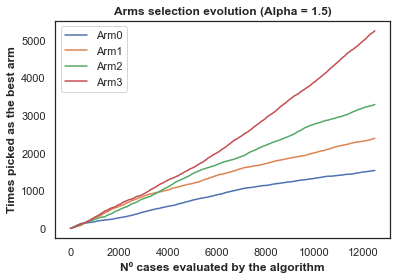

In [123]:
Plot_ArmsSelection(Paths_Best3_4, 1, Alpha)

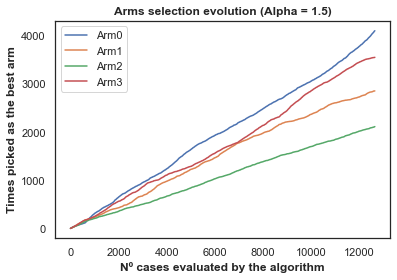

In [124]:
Plot_ArmsSelection(Paths_Best3_4, 2, Alpha)

Times each arm is chosen: [3385.4 3127.2 3187.6 2855. ]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 74.0825648161745
Proportion source_alias_source2 equals 0 for arm 1 is: 73.93518145462063
Proportion source_alias_source2 equals 0 for arm 2 is: 71.10345367264414
Proportion source_alias_source2 equals 0 for arm 3 is: 78.79467484402952


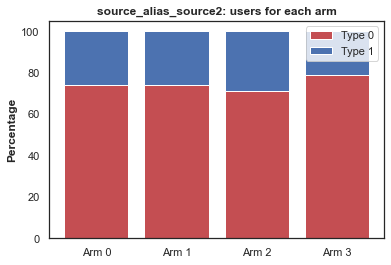

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 68.31701750939125
Proportion platform_alias_platform2 equals 0 for arm 1 is: 80.75240480247705
Proportion platform_alias_platform2 equals 0 for arm 2 is: 75.9160567795217
Proportion platform_alias_platform2 equals 0 for arm 3 is: 82.6107733951085


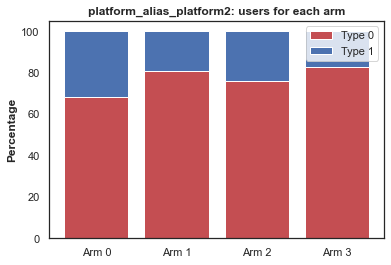

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.15190128 0.16428164 0.68381708]
Proportion country for arm 1 is: [0.12917494 0.11058586 0.7602392 ]
Proportion country for arm 2 is: [0.14407302 0.14741042 0.70851656]
Proportion country for arm 3 is: [0.13052342 0.12801907 0.74145751]


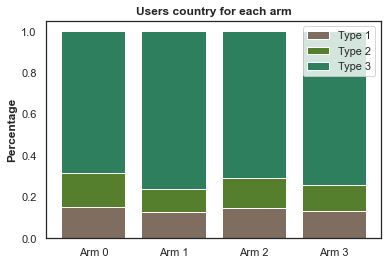

In [125]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3_4, Feat_Best3_4)

In [130]:
printFeatures2(Mark_Best3_4, Feat_Best3_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 84.80987238277194
Proportion country_alias_country_group1 equals 0 for arm 1 is: 87.08250607439145
Proportion country_alias_country_group1 equals 0 for arm 2 is: 85.59269792694613
Proportion country_alias_country_group1 equals 0 for arm 3 is: 86.9476580431787

Proportion country_alias_country_group2 equals 0 for arm 0 is: 83.57183604675355
Proportion country_alias_country_group2 equals 0 for arm 1 is: 88.94141381340425
Proportion country_alias_country_group2 equals 0 for arm 2 is: 85.2589582776084
Proportion country_alias_country_group2 equals 0 for arm 3 is: 87.19809344716147

Proportion country_alias_country_group3 equals 0 for arm 0 is: 31.618291570474504
Proportion country_alias_country_group3 equals 0 for arm 1 is: 23.976080112204272
Proportion country_alias_country_group3 equals 0 for arm 2 is: 29.148343795445474
Proportion country_alias_country_group3 equals 0 for arm 3 is: 25.854248509659843

Proportion platform_ali

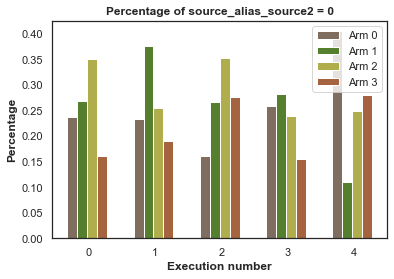

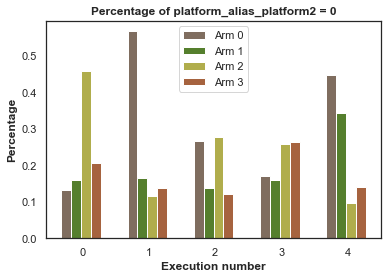

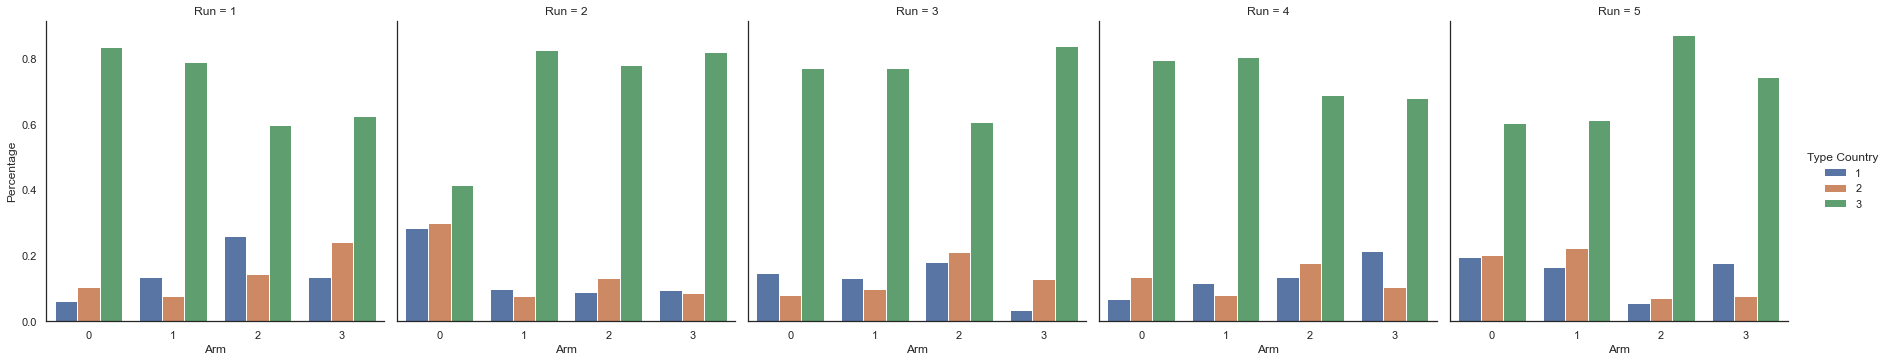

In [164]:
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "platform_alias_platform2")
PlotFeaturesArm_4_Country5Runs(Feat_Best3_4)

#### Day 7

In [139]:
Reward = "num_sessions_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_4, Paths_Best7_4, Aligns_Best7_4, Mean_Reward_Best7_4, Mean_RewardArms_Best7_4, Mark_Best7_4, Feat_Best7_4, Times_ArmChosen7_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

  0%|                                                                              | 35/50000 [00:00<02:24, 346.57it/s]

Score to beat: 1.1821921921924807
Parameters for following model:
	Reward: num_sessions_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 0.5


  0%|                                                                              | 37/50000 [00:00<02:16, 366.34it/s]

	Algorithm result is: 1.1896089314834768
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 1


  0%|                                                                              | 30/50000 [00:00<02:48, 296.87it/s]

	Algorithm result is: 1.1892489979055247
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 1.5


  0%|                                                                              | 40/50000 [00:00<02:06, 395.72it/s]

	Algorithm result is: 1.1805995453821072
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2


  0%|                                                                              | 39/50000 [00:00<02:10, 382.76it/s]

	Algorithm result is: 1.1719461298507852
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2.3581015157406195


  0%|                                                                              | 37/50000 [00:00<02:16, 366.03it/s]

	Algorithm result is: 1.1713672533739508
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2.480207187300798


  0%|                                                                              | 37/50000 [00:00<02:19, 358.88it/s]

	Algorithm result is: 1.18207181477983
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 3


  0%|                                                                              | 33/50000 [00:00<02:33, 326.46it/s]

	Algorithm result is: 1.184461132488262
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:14<00:00, 370.63it/s]

	Algorithm result is: 1.189657330941037
	Score to beat is: 1.1821921921924807


In [140]:
Results7_4

[1.1896089314834768,
 1.1892489979055247,
 1.1805995453821072,
 1.1719461298507852,
 1.1713672533739508,
 1.18207181477983,
 1.184461132488262,
 1.189657330941037]

In [141]:
print("Best alpha is:", Alphas[Results7_4.index(np.max(Results7_4))])
Alpha = Alphas[Results7_4.index(np.max(Results7_4))]

Best alpha is: 3.5


In [142]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

1.178004928004837
1.1782938790237203


In [143]:
Reward

'num_sessions_d7'

In [144]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4))

Score to beat: 1.1821921921924807
Algorithm score: 1.189657330941037


In [145]:
Mean_Reward_Best7_4

[1.2309335256748968,
 1.1828579629987817,
 1.179339094056151,
 1.1969533360851097,
 1.1582027358902456]

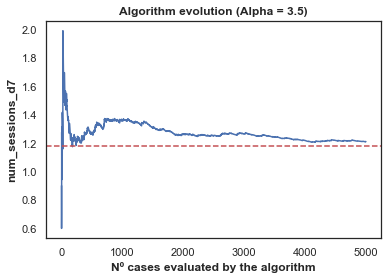

In [147]:
Plot_AlignRewards(Aligns_Best7_4, 0, Reward, Alpha, N = 5000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

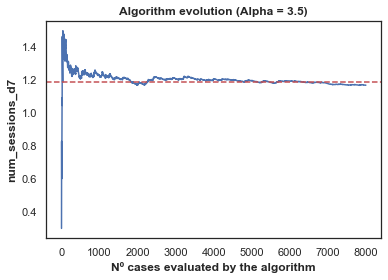

In [150]:
Plot_AlignRewards(Aligns_Best7_4, 1, Reward, Alpha, N = 8000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

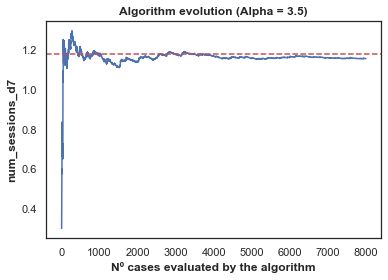

In [151]:
Plot_AlignRewards(Aligns_Best7_4, 4, Reward, Alpha, N = 8000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

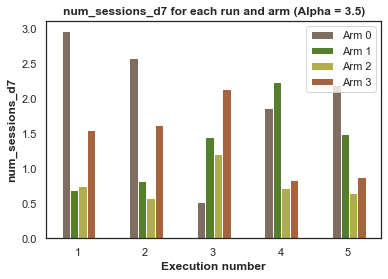

In [152]:
PerformanceArm4(Mean_RewardArms_Best7_4, Alpha, Reward)

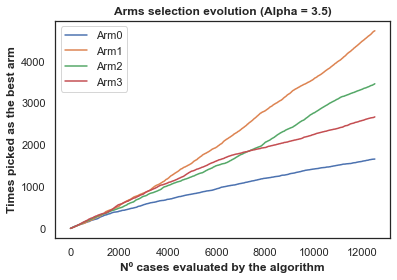

In [153]:
Plot_ArmsSelection(Paths_Best7_4, 0, Alpha)

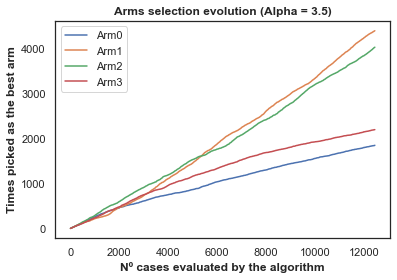

In [154]:
Plot_ArmsSelection(Paths_Best7_4, 1, Alpha)

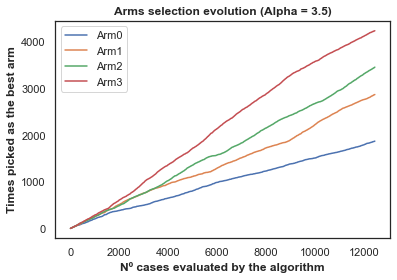

In [155]:
Plot_ArmsSelection(Paths_Best7_4, 4, Alpha)

Times each arm is chosen: [2308.  3689.6 3408.  3071. ]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 68.51063842479202
Proportion source_alias_source2 equals 0 for arm 1 is: 80.82298894898037
Proportion source_alias_source2 equals 0 for arm 2 is: 70.98018212918744
Proportion source_alias_source2 equals 0 for arm 3 is: 74.15612320473612


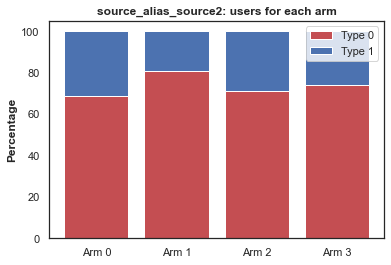

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 62.52169866918529
Proportion platform_alias_platform2 equals 0 for arm 1 is: 81.18637576827605
Proportion platform_alias_platform2 equals 0 for arm 2 is: 83.42308881200005
Proportion platform_alias_platform2 equals 0 for arm 3 is: 76.9589561640368


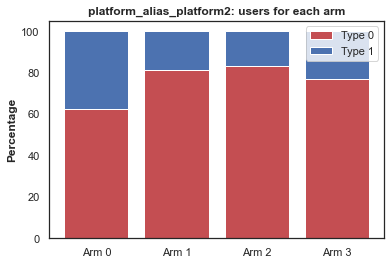

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.14645495 0.2187232  0.63482185]
Proportion country for arm 1 is: [0.11266437 0.12237132 0.7649643 ]
Proportion country for arm 2 is: [0.15048645 0.10767892 0.74183463]
Proportion country for arm 3 is: [0.11784282 0.10769538 0.7744618 ]


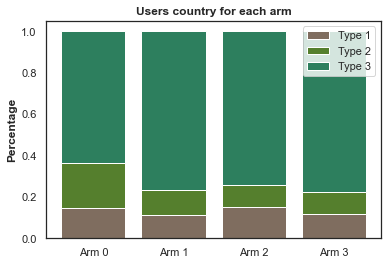

In [156]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4, Feat_Best7_4)

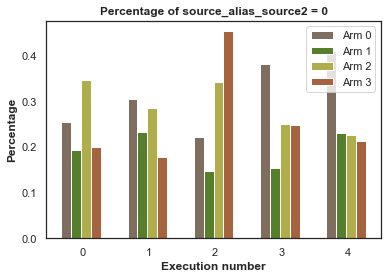

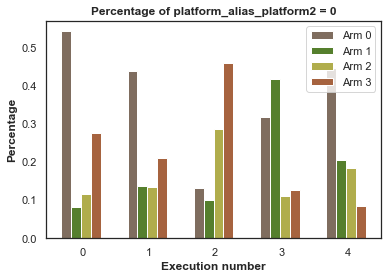

In [158]:
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "platform_alias_platform2")

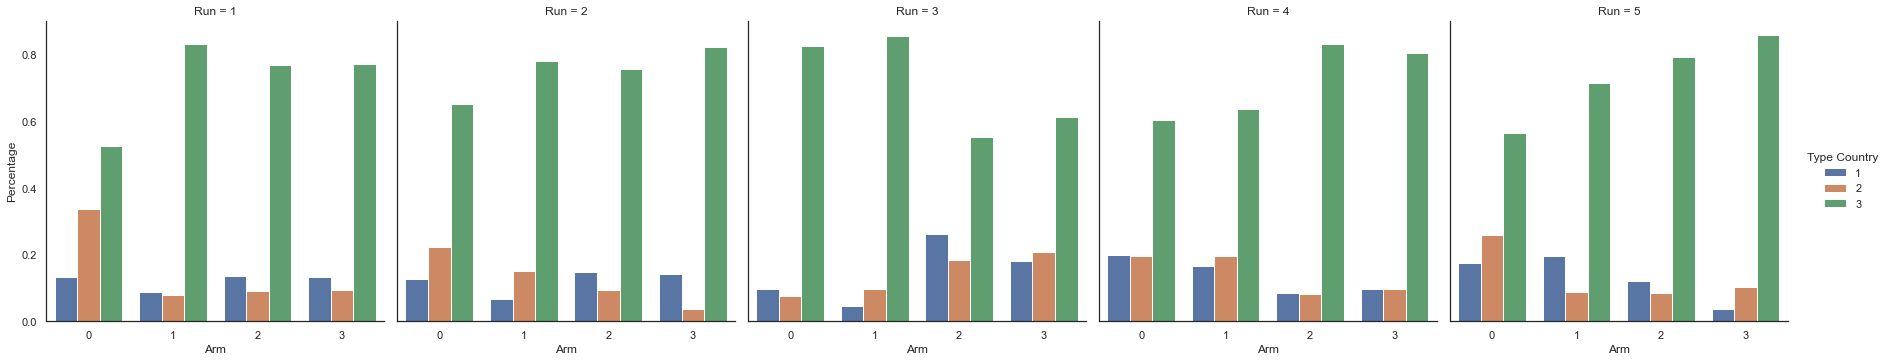

In [163]:
PlotFeaturesArm_4_Country5Runs(Feat_Best7_4)

#### Removing features

In [180]:
Reward = "num_sessions_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_4_aux5, Paths_Best7_4_aux5, Aligns_Best7_4_aux5, Mean_Reward_Best7_4_aux5, Mean_RewardArms_Best7_4_aux5, Mark_Best7_4_aux5, Feat_Best7_4_aux5, Times_ArmChosen7_4_aux5 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

  0%|                                                                              | 48/50000 [00:00<01:44, 479.58it/s]

Score to beat: 1.1821921921924807
Parameters for following model:
	Reward: num_sessions_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 0.5


  0%|                                                                              | 43/50000 [00:00<01:56, 429.98it/s]

	Algorithm result is: 1.1878530248937857
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 1


  0%|                                                                              | 47/50000 [00:00<01:46, 469.82it/s]

	Algorithm result is: 1.1720411990475363
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 1.5


  0%|                                                                              | 50/50000 [00:00<01:39, 499.98it/s]

	Algorithm result is: 1.174292449486836
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2


  0%|                                                                              | 44/50000 [00:00<01:53, 439.62it/s]

	Algorithm result is: 1.1660352856283318
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2.3581015157406195


  0%|                                                                              | 52/50000 [00:00<01:36, 519.59it/s]

	Algorithm result is: 1.1821764403298718
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 2.480207187300798


  0%|                                                                              | 52/50000 [00:00<01:36, 519.62it/s]

	Algorithm result is: 1.1829841946522213
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 3


  0%|                                                                              | 53/50000 [00:00<01:35, 524.33it/s]

	Algorithm result is: 1.1840378958051814
	Score to beat is: 1.1821921921924807
EVALUATION WITH DIFFERENT ALPHAS FOR num_sessions_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:36<00:00, 518.64it/s]

	Algorithm result is: 1.197090355088887
	Score to beat is: 1.1821921921924807


In [181]:
Results7_4_aux5

[1.1878530248937857,
 1.1720411990475363,
 1.174292449486836,
 1.1660352856283318,
 1.1821764403298718,
 1.1829841946522213,
 1.1840378958051814,
 1.197090355088887]

In [186]:
print("Best alpha is:", Alphas[Results7_4_aux5.index(np.max(Results7_4_aux5))])
Alpha = Alphas[Results7_4_aux5.index(np.max(Results7_4_aux5))]

Best alpha is: 3.5


In [187]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

1.178004928004837
1.1782938790237203


In [188]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4_aux5))

Score to beat: 1.1821921921924807
Algorithm score: 1.197090355088887


In [189]:
Mean_Reward_Best7_4_aux5

[1.233586168092554,
 1.191496821321584,
 1.224618561389693,
 1.157018992873213,
 1.1787312317673908]

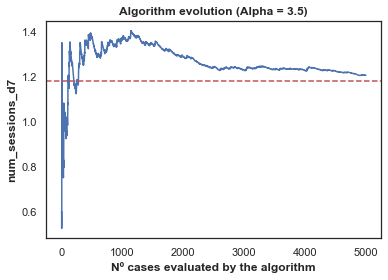

In [190]:
Plot_AlignRewards(Aligns_Best7_4_aux5, 0, Reward, Alpha, N = 5000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

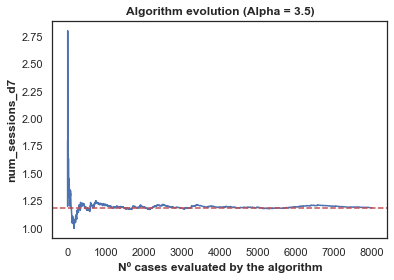

In [191]:
Plot_AlignRewards(Aligns_Best7_4_aux5, 1, Reward, Alpha, N = 8000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

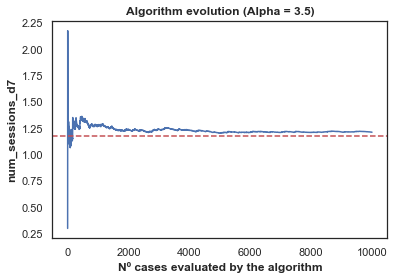

In [193]:
Plot_AlignRewards(Aligns_Best7_4_aux5, 2, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

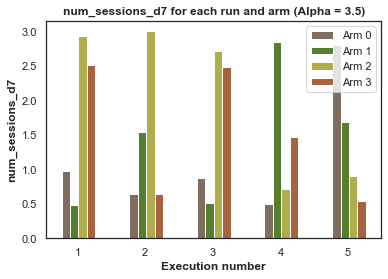

In [194]:
PerformanceArm4(Mean_RewardArms_Best7_4_aux5, Alpha, Reward)

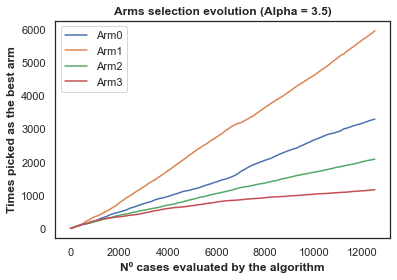

In [195]:
Plot_ArmsSelection(Paths_Best7_4_aux5, 0, Alpha)

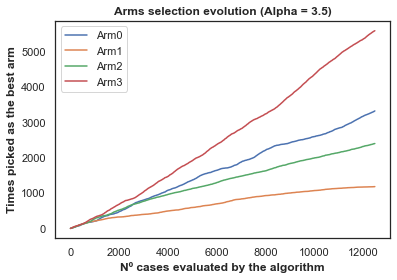

In [196]:
Plot_ArmsSelection(Paths_Best7_4_aux5, 1, Alpha)

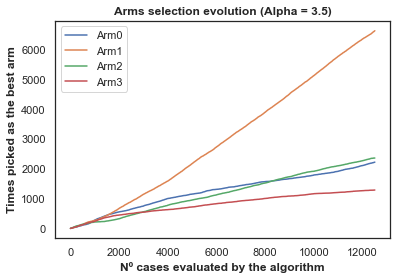

In [198]:
Plot_ArmsSelection(Paths_Best7_4_aux5, 2, Alpha)

Times each arm is chosen: [3197.  3474.8 2552.6 3283.4]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 68.51063842479202
Proportion source_alias_source2 equals 0 for arm 1 is: 80.82298894898037
Proportion source_alias_source2 equals 0 for arm 2 is: 70.98018212918744
Proportion source_alias_source2 equals 0 for arm 3 is: 74.15612320473612


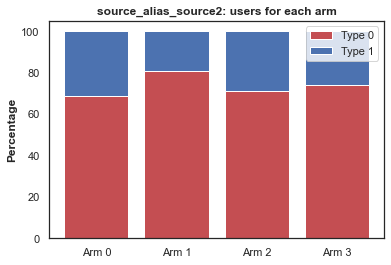

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 62.52169866918529
Proportion platform_alias_platform2 equals 0 for arm 1 is: 81.18637576827605
Proportion platform_alias_platform2 equals 0 for arm 2 is: 83.42308881200005
Proportion platform_alias_platform2 equals 0 for arm 3 is: 76.9589561640368


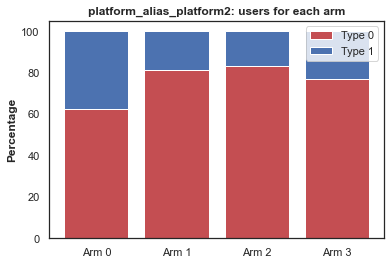

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.11821945 0.16343974 0.71834081]
Proportion country for arm 1 is: [0.12059065 0.16983931 0.70957003]
Proportion country for arm 2 is: [0.15706427 0.10746699 0.73546874]
Proportion country for arm 3 is: [0.18301673 0.17610569 0.64087758]


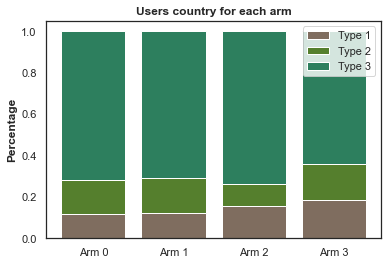

In [199]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4_aux5, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4_aux5, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4_aux5, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4_aux5, Feat_Best7_4_aux5)

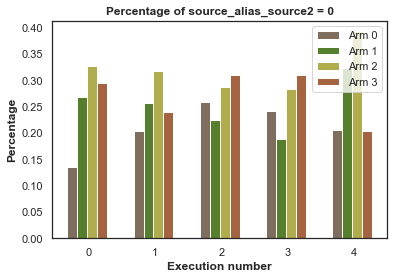

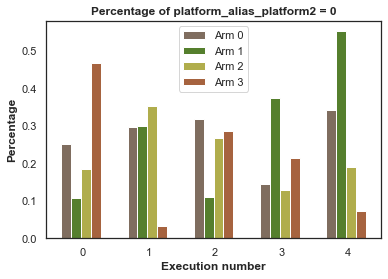

In [200]:
PlotFeaturesArm_4(Feat_Best7_4_aux5, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4_aux5, Alpha, Reward = "platform_alias_platform2")

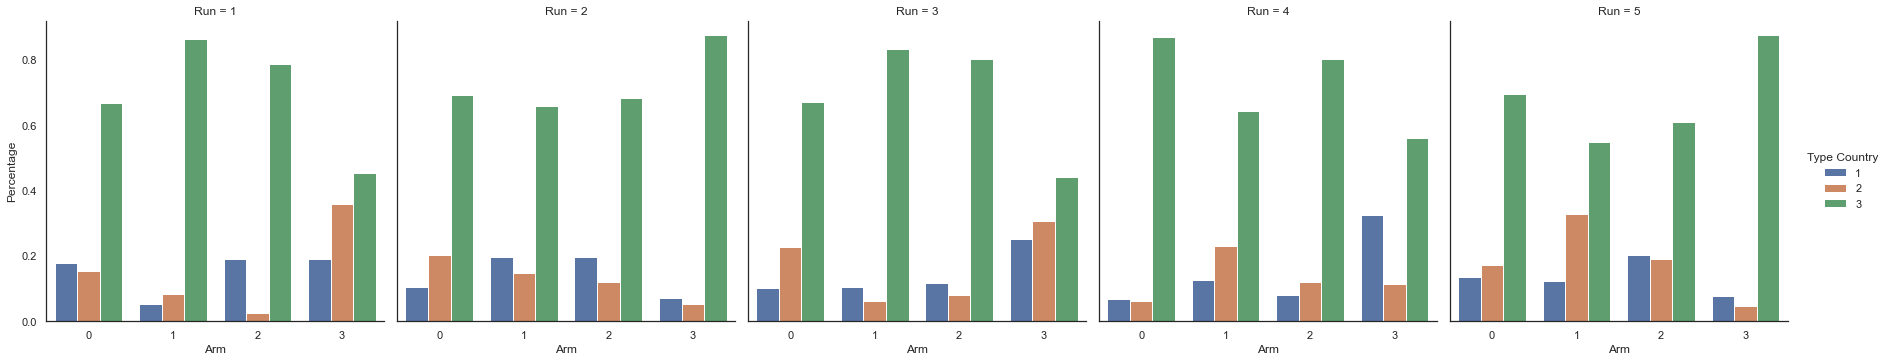

In [201]:
PlotFeaturesArm_4_Country5Runs(Feat_Best7_4_aux5)